In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset
data = pd.read_csv('New Dataframe.csv')

# Define features (X) and target (y)
X = data.drop(columns=['Target'])  # Replace 'Target' with the name of your target variable
y = data['Target']

# Split the data into train, validation, and test sets (65:20:15 ratio)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286 ≈ 15/35

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize and train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predictions
y_val_pred = svr.predict(X_val)
y_test_pred = svr.predict(X_test)

# Calculate evaluation metrics
metrics = {
    'Validation R²': r2_score(y_val, y_val_pred),
    'Validation MedAE': median_absolute_error(y_val, y_val_pred),
    'Validation MAE': mean_absolute_error(y_val, y_val_pred),
    'Validation RMSE': np.sqrt(mean_squared_error(y_val, y_val_pred)),
    'Test R²': r2_score(y_test, y_test_pred),
    'Test MedAE': median_absolute_error(y_test, y_test_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
}

# Additional statistics for validation predictions
val_stats = {
    'Validation Std Dev': np.std(y_val_pred),
    'Validation Avg': np.mean(y_val_pred),
    'Validation Min': np.min(y_val_pred),
    'Validation Max': np.max(y_val_pred),
}

# Additional statistics for test predictions
test_stats = {
    'Test Std Dev': np.std(y_test_pred),
    'Test Avg': np.mean(y_test_pred),
    'Test Min': np.min(y_test_pred),
    'Test Max': np.max(y_test_pred),
}

# Print metrics rounded to 2 decimal places
print("Validation Metrics:")
for metric, value in metrics.items():
    if "Validation" in metric:
        print(f"{metric}: {value:.2f}")

print("\nValidation Prediction Statistics:")
for stat, value in val_stats.items():
    print(f"{stat}: {value:.2f}")

print("\nTest Metrics:")
for metric, value in metrics.items():
    if "Test" in metric:
        print(f"{metric}: {value:.2f}")

print("\nTest Prediction Statistics:")
for stat, value in test_stats.items():
    print(f"{stat}: {value:.2f}")

Validation Metrics:
Validation R²: -0.00
Validation MedAE: 85.90
Validation MAE: 166.25
Validation RMSE: 210.50

Validation Prediction Statistics:
Validation Std Dev: 11.30
Validation Avg: 96.76
Validation Min: 84.47
Validation Max: 110.20

Test Metrics:
Test R²: -0.18
Test MedAE: 132.56
Test MAE: 201.43
Test RMSE: 238.45

Test Prediction Statistics:
Test Std Dev: 11.51
Test Avg: 98.13
Test Min: 84.32
Test Max: 110.90


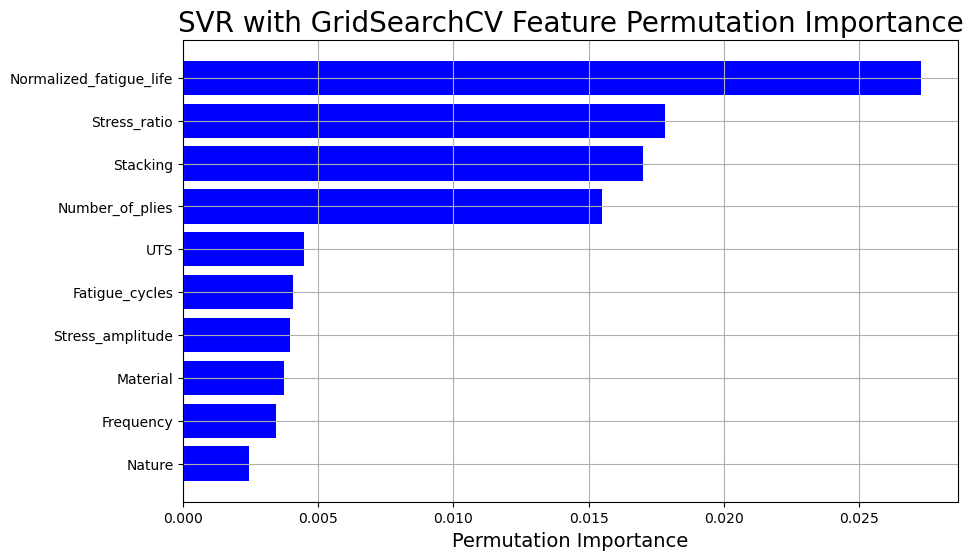

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Compute permutation importance on the validation set
perm_importance = permutation_importance(svr, X_val, y_val, n_repeats=30, random_state=42)

# Get feature importance and sort by ascending order
feature_importance = perm_importance.importances_mean
sorted_idx = np.argsort(feature_importance)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx], color='blue')
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel("Permutation Importance", fontsize=14)
plt.title("SVR with GridSearchCV Feature Permutation Importance", fontsize=20)
plt.grid(True)

# Save the plot as an image
plt.savefig('SVR GS.tiff', bbox_inches='tight', pad_inches=0.1)  # Add padding to avoid clipping))

plt.show()

In [ ]:
import numpy as np
np.logspace(-3, 3, 7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('New Dataframe.csv')

# Define features (X) and target (y)
X = data.drop(columns=['Target'])  # Replace 'Target' with the name of your target variable
y = data['Target']

# Split the data into train, validation, and test sets (65:20:15 ratio)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286 ≈ 15/35

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define SVR model and parameter grid for grid search
svr = SVR()
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Regularization parameter (log scale)
    'epsilon': np.linspace(0.01, 0.1, 10),  # Tube size (epsilon)
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Types of kernels
    'degree': [2, 3, 4],  # Degree of polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model after grid search
svr_gs = grid_search.best_estimator_
cv_r2_score = grid_search.best_score_

# Predictions on validation and test sets
y_val_pred_gs = svr_gs.predict(X_val)
y_test_pred_gs = svr_gs.predict(X_test)

# Calculate evaluation metrics for validation set
val_r2 = r2_score(y_val, y_val_pred_gs)
val_mae = mean_absolute_error(y_val, y_val_pred_gs)
val_medae = median_absolute_error(y_val, y_val_pred_gs)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_gs))

# Calculate evaluation metrics for test set
test_r2 = r2_score(y_test, y_test_pred_gs)
test_mae = mean_absolute_error(y_test, y_test_pred_gs)
test_medae = median_absolute_error(y_test, y_test_pred_gs)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_gs))

# Additional statistics for validation predictions
val_stats = {
    'Validation Std Dev': np.std(y_val_pred_gs),
    'Validation Avg': np.mean(y_val_pred_gs),
    'Validation Min': np.min(y_val_pred_gs),
    'Validation Max': np.max(y_val_pred_gs),
}

# Additional statistics for test predictions
test_stats = {
    'Test Std Dev': np.std(y_test_pred_gs),
    'Test Avg': np.mean(y_test_pred_gs),
    'Test Min': np.min(y_test_pred_gs),
    'Test Max': np.max(y_test_pred_gs),
}

# Print best parameters and cross-validation score
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print(f"Cross-Validation R²: {cv_r2_score:.2f}\n")

# Print validation metrics
print("Validation Metrics:")
print(f"R²: {val_r2:.2f}")
print(f"MAE: {val_mae:.2f}")
print(f"MedAE: {val_medae:.2f}")
print(f"RMSE: {val_rmse:.2f}")
print(f"Std Dev: {val_stats['Validation Std Dev']:.2f}")
print(f"Avg: {val_stats['Validation Avg']:.2f}")
print(f"Min: {val_stats['Validation Min']:.2f}")
print(f"Max: {val_stats['Validation Max']:.2f}\n")

# Print test metrics
print("Test Metrics:")
print(f"R²: {test_r2:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"MedAE: {test_medae:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"Std Dev: {test_stats['Test Std Dev']:.2f}")
print(f"Avg: {test_stats['Test Avg']:.2f}")
print(f"Min: {test_stats['Test Min']:.2f}")
print(f"Max: {test_stats['Test Max']:.2f}")

Best Parameters from GridSearchCV: {'C': 1000.0, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Cross-Validation R²: 0.91

Validation Metrics:
R²: 0.70
MAE: 45.88
MedAE: 3.39
RMSE: 115.12
Std Dev: 205.97
Avg: 189.01
Min: -0.12
Max: 530.41

Test Metrics:
R²: 0.71
MAE: 47.05
MedAE: 9.15
RMSE: 118.22
Std Dev: 213.05
Avg: 233.99
Min: -0.14
Max: 528.89


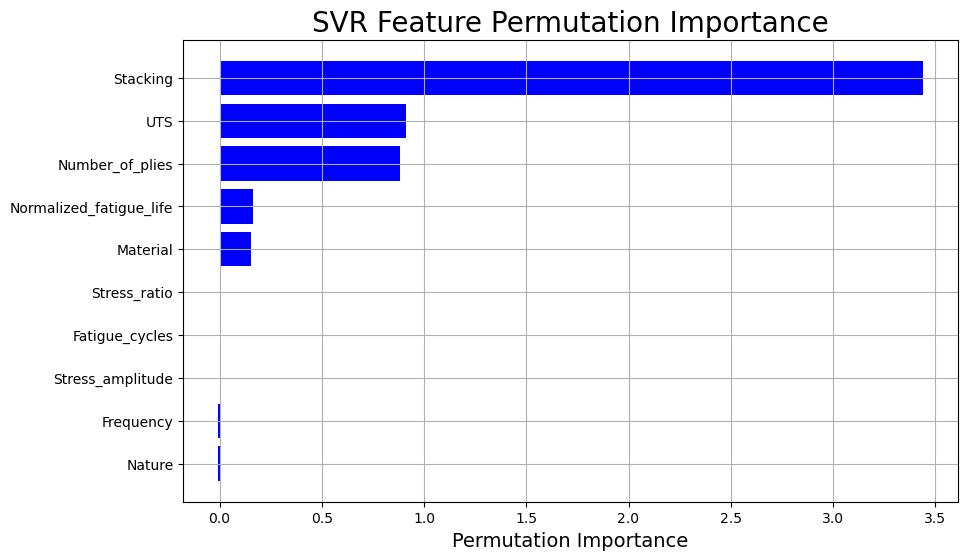

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Compute permutation importance on the validation set
perm_importance = permutation_importance(svr_gs, X_val, y_val, n_repeats=30, random_state=42)

# Get feature importance and sort by ascending order
feature_importance = perm_importance.importances_mean
sorted_idx = np.argsort(feature_importance)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx], color='blue')
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel("Permutation Importance", fontsize=14)
plt.title("SVR Feature Permutation Importance", fontsize=20)
plt.grid(True)

# Save the plot as an image
#plt.savefig('SVR.tiff', bbox_inches='tight', pad_inches=0.1)  # Add padding to avoid clipping))

plt.show()

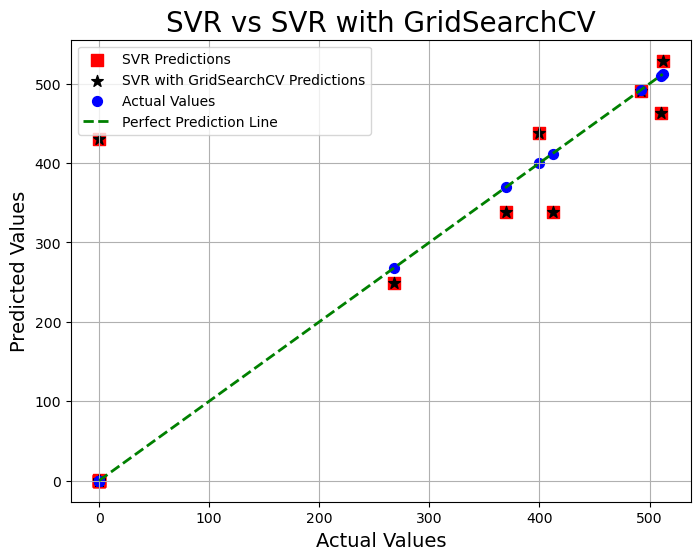

In [ ]:
# Generate Scatter Plot for ElasticNet vs GridSearchCV ElasticNet
plt.figure(figsize=(8, 6))

# Plot predictions from ElasticNet
plt.scatter(y_test, y_test_pred, marker='s', color='red', s=75, label="SVR Predictions")

# Plot predictions from GridSearchCV ElasticNet
plt.scatter(y_test, y_test_pred_gs, marker='*', color='black', s=75, label="SVR with GridSearchCV Predictions")

# Actual values (Round markers, green color)
plt.scatter(y_test, y_test, marker='o', color='blue', s=50, label="Actual Values")

# Reference line (Perfect prediction line y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Adding labels and legend
plt.title("SVR vs SVR with GridSearchCV", fontsize=20)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot as an image
plt.savefig('SVR vs SVR with gridserach.tiff')

# Show plot
plt.show()